# 🌟 Introduction

Dataset used in this notebook aims to classificate stars, galaxies, and quasars based on their spectral characteristics. Support Vector Machine (SVM) and Random Forest algorithms are used for classification purposes in this notebook. The dataset is an imbalanced dataset. For this reason, Synthetic Minority Oversampling Technique (SMOTE) is used to eliminate the imbalance between classes. Outlier values are detected with the Local Outlier Factor and these values are removed from the dataset. In the 16-dimensional data set, the correlations of the features with the class label are checked and the features with a correlation greater than 0.16 are used for classification. In addition, the seaborn library and the yellow brick library are used for data visualization.

<img src="https://media2.giphy.com/media/OYfQ5c7FPeBxe/giphy.gif">

### 💫 Content

1. [Load and Check Data](#1)
1. [Detect Outliers](#2)
1. [Feature Selection](#3)
1. [Dealing with Imbalanced Data](#4)
1. [Data Scaling](#5)
1. [Import Libraries](#6)
1. [Train / Test Split](#7)
1. [Classifiers](#8)
    * [SVM Classifier](#9)
        * [Confusion Matrix](#10)
        * [Classification Report](#11)
        * [ROC Curve](#12)
        * [Class Prediction Error](#13)
    * [Random Forest Classifier](#14)
        * [Confusion Matrix](#15)
        * [Classification Report](#16)
        * [ROC Curve](#17)
        * [Class Prediction Error](#18)

<a id='1'></a><br>
# Load and Check Data

In [92]:
import pandas as pd
import numpy as np
df= pd.read_csv(r"C:\Users\Unnatesh\Documents\Python Scripts\Star_Prediction\star_classification.csv")

In [93]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [95]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [96]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
df["class"].value_counts()

class
0    59445
1    21594
2    18961
Name: count, dtype: int64

In [99]:
df.shape

(100000, 18)

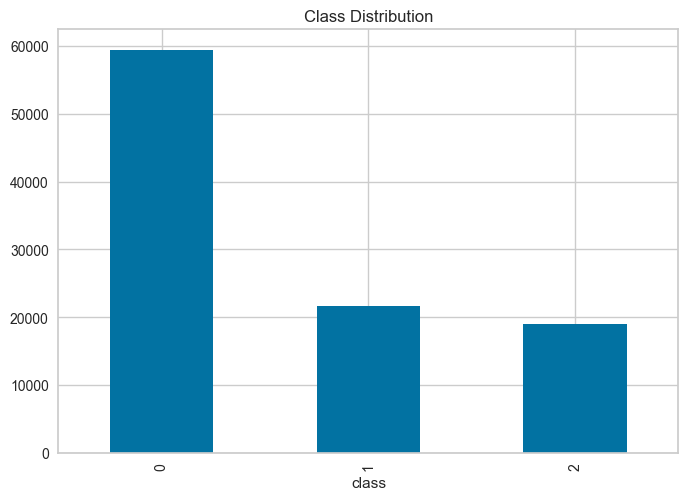

In [100]:
import matplotlib.pyplot as plt
df["class"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.show()


<a id='2'></a><br>
# Detect Outliers

In [101]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 

In [102]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5                                            
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [103]:
len(outlier_index)

15256

In [104]:
df.drop(outlier_index, inplace=True)

<a id='3'></a><br>
# Feature Selection

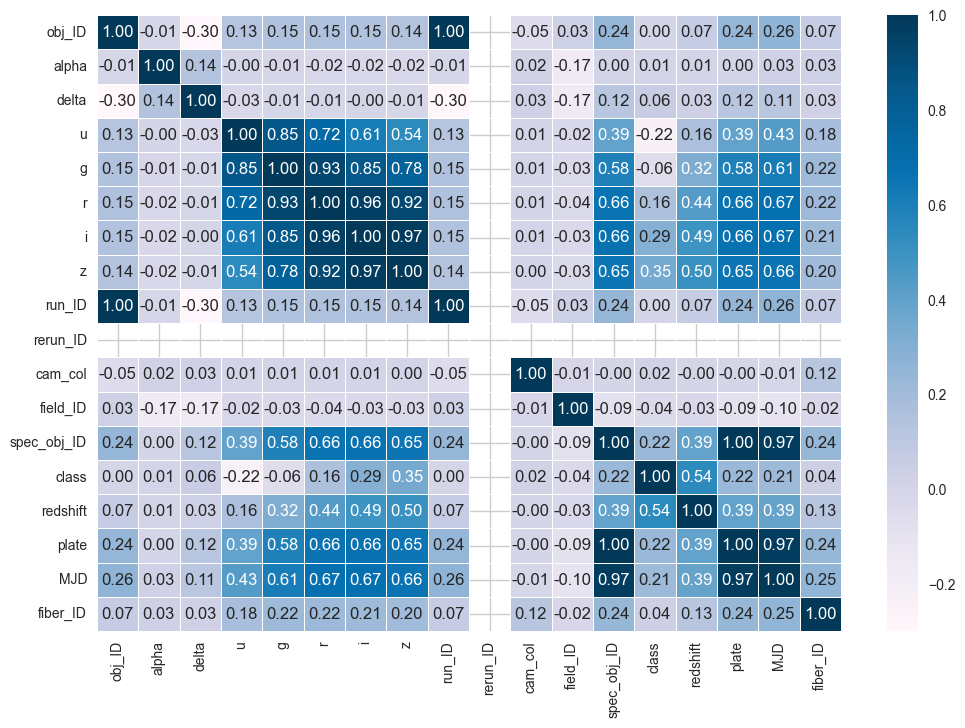

In [105]:
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [106]:
corr = df.corr()

In [107]:
corr["class"].sort_values()

u             -0.222802
g             -0.058192
field_ID      -0.037542
run_ID         0.000250
obj_ID         0.000252
alpha          0.008187
cam_col        0.017789
fiber_ID       0.037319
delta          0.058947
r              0.160654
MJD            0.214433
spec_obj_ID    0.224718
plate          0.224718
i              0.294075
z              0.349711
redshift       0.541667
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [108]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

<a id='4'></a><br>
# Dealing with Imbalanced Data

In [109]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [110]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [111]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({np.int64(0): 50695, np.int64(1): 17890, np.int64(2): 16159})
Resampled dataset shape Counter({np.int64(0): 50695, np.int64(2): 50695, np.int64(1): 50695})


C:\Users\Unnatesh\AppData\Local\Temp\ipykernel_21180\399342394.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y[y.isin(top_n.index)], palette='Set3')


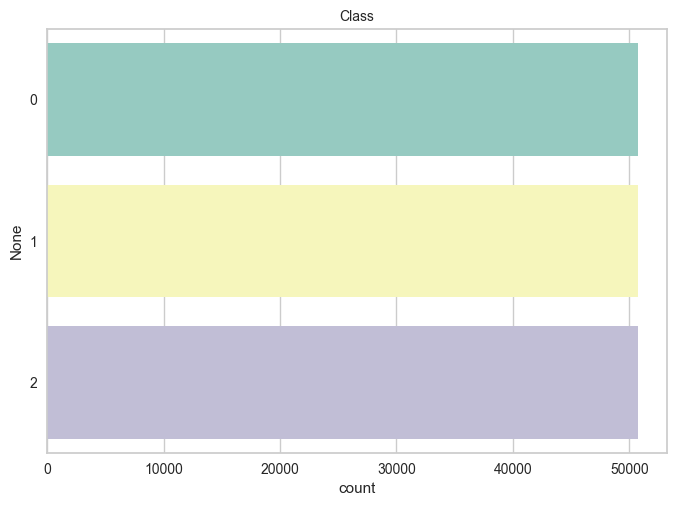

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y to a pandas Series if it's not already
y = pd.Series(y)

# Get the top 10 most frequent values
top_n = y.value_counts().head(10)

# Create the countplot for the top 10 categories
sns.countplot(y=y[y.isin(top_n.index)], palette='Set3')
plt.title("Class", fontsize=10)
plt.show()


<a id='5'></a><br>
# Data Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

<a id='6'></a><br>
# Import Libraries

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

<a id='7'></a><br>
# Train / Test Split

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

<a id='8'></a><br>
# Classifiers

<a id='9'></a><br>
## SVM Classifier 

In [116]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.971


In [117]:
classes = ['GALAXY','STAR','QSO']

<a id='10'></a><br>
### Confusion Matrix

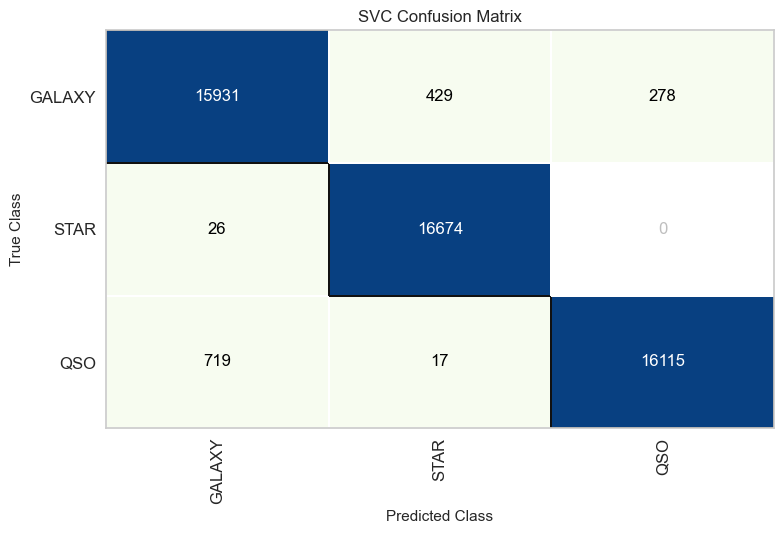

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [118]:
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='GnBu')

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

<a id='11'></a><br>
### Classification Report

In [119]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16638
           1       0.97      1.00      0.99     16700
           2       0.98      0.96      0.97     16851

    accuracy                           0.97     50189
   macro avg       0.97      0.97      0.97     50189
weighted avg       0.97      0.97      0.97     50189



<a id='12'></a><br>
### ROC Curve

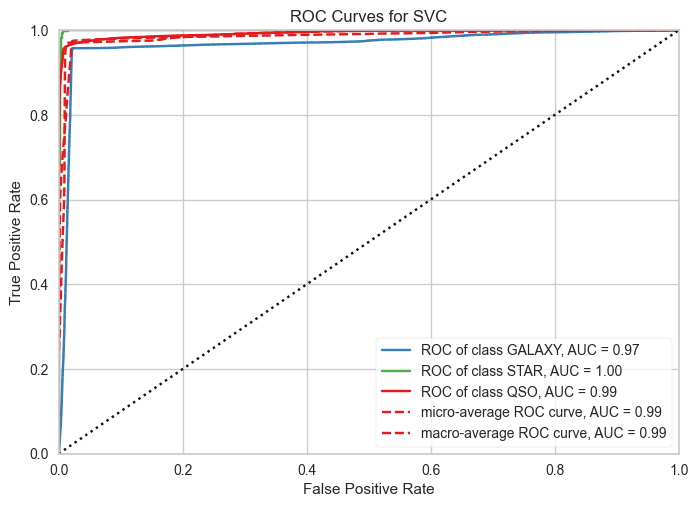

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [120]:
visualizer = ROCAUC(svm_clf, classes=classes)

set_palette('bold')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

<a id='13'></a><br>
### Class Prediction Error

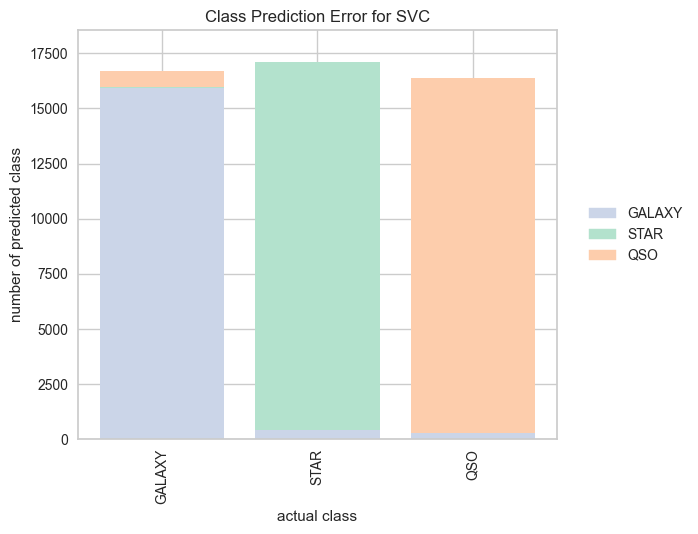

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [121]:
visualizer = ClassPredictionError(svm_clf, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Draw visualization

<a id='14'></a><br>
## Random Forest Classifier

In [122]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.984


<a id='15'></a><br>
### Confusion Matrix

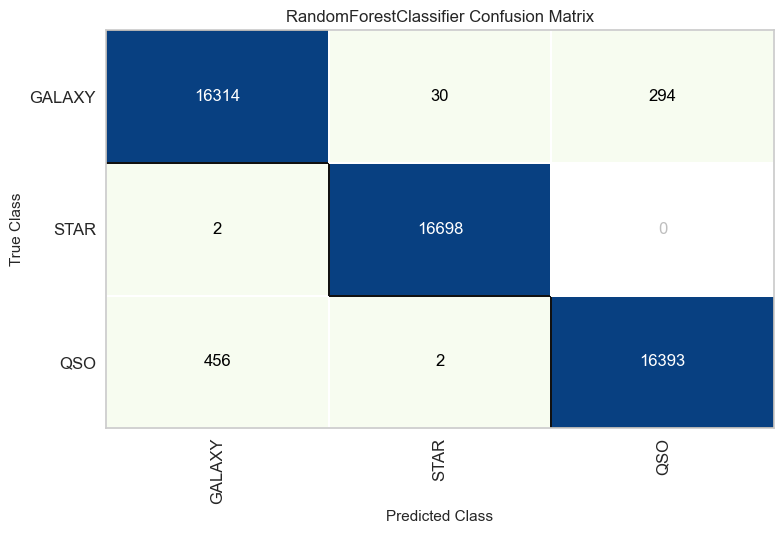

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [123]:
r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

<a id='16'></a><br>
### Classification Report

In [124]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16638
           1       1.00      1.00      1.00     16700
           2       0.98      0.97      0.98     16851

    accuracy                           0.98     50189
   macro avg       0.98      0.98      0.98     50189
weighted avg       0.98      0.98      0.98     50189



<a id='17'></a><br>
### ROC Curve

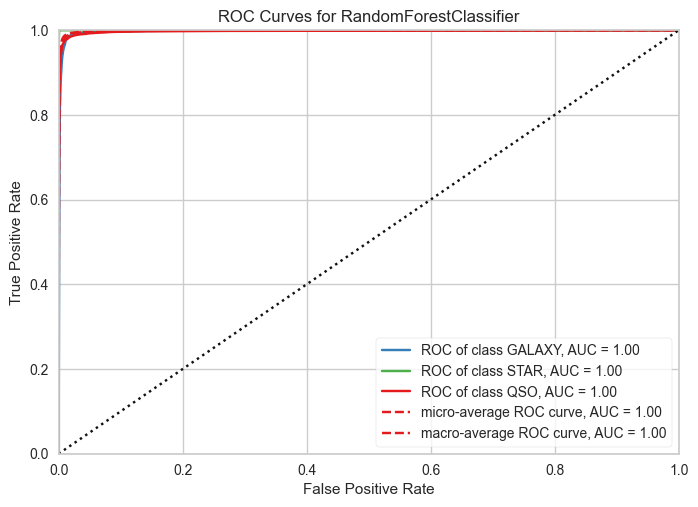

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [125]:
visualizer = ROCAUC(r_forest, classes=["GALAXY", "STAR", "QSO"])

set_palette('bold')

visualizer.fit(x_train, y_train)       
visualizer.score(x_test, y_test)        
visualizer.show()                      

<a id='18'></a><br>
### Class Prediction Error

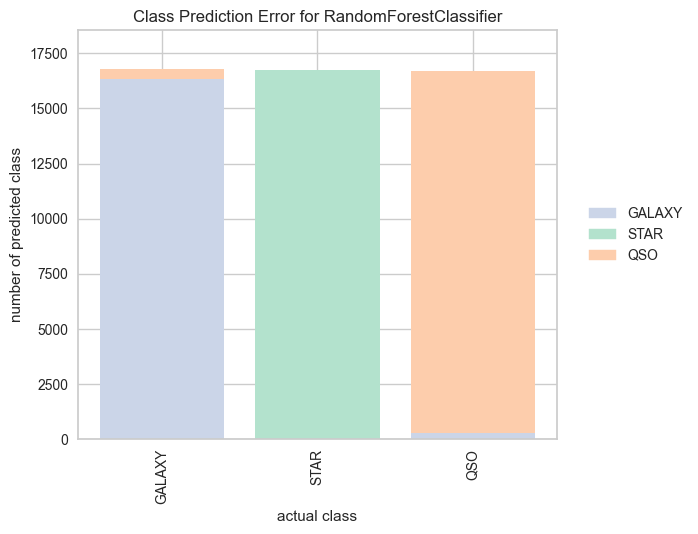

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [126]:
visualizer = ClassPredictionError(r_forest, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()                       